In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = "C:/Users/aashi/Downloads/SwissProt_Features.csv"
data = pd.read_csv(file_path)

#fixing X and y
rfe_cols = ['Aromaticity', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_N',
       'AAC_P', 'AAC_Q', 'AAC_W', 'DPC1_GF', 'DPC1_LE', 'DPC1_PP', 'DPC1_PR',
       'DPC1_PT', 'DPC1_RT', 'DPC1_VA', 'PCP_PC', 'PCP_NE', 'PCP_HB']

X = data[rfe_cols]
y = data['Label']

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees classifier
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_clf.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred = extra_trees_clf.predict(X_train)
y_test_pred = extra_trees_clf.predict(X_test)

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_specificity = specificity_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_mcc = matthews_corrcoef(y_train, y_train_pred)

# Calculate metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_specificity = specificity_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_mcc = matthews_corrcoef(y_test, y_test_pred)

# Compile results into a table
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "MCC"],
    "Training": [train_accuracy, train_precision, train_recall, train_specificity, train_f1, train_mcc],
    "Testing": [test_accuracy, test_precision, test_recall, test_specificity, test_f1, test_mcc]
})

results


,Metric,Training,Testing
0,Accuracy,1.0,0.816092
1,Precision,1.0,0.847826
2,Recall,1.0,0.812500
3,Specificity,1.0,0.820513
4,F1 Score,1.0,0.829787
5,MCC,1.0,0.630659


In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Reload the dataset
# Load the dataset
file_path = "C:/Users/aashi/Downloads/SwissProt_Features.csv"
data = pd.read_csv(file_path)

#fixing X and y
rfe_cols = ['Aromaticity', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_N',
       'AAC_P', 'AAC_Q', 'AAC_W', 'DPC1_GF', 'DPC1_LE', 'DPC1_PP', 'DPC1_PR',
       'DPC1_PT', 'DPC1_RT', 'DPC1_VA', 'PCP_PC', 'PCP_NE', 'PCP_HB']

X = data[rfe_cols]
y = data['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Extra Trees Classifier with regularization parameters to reduce overfitting
extra_trees = ExtraTreesClassifier(
    n_estimators=100,        # Number of trees
    max_depth=10,            # Limit the depth of trees
    min_samples_split=10,    # Minimum samples to split an internal node
    min_samples_leaf=5,      # Minimum samples at a leaf node
    max_features="sqrt",     # Number of features to consider for the best split
    random_state=42
)

# Fit the model
extra_trees.fit(X_train, y_train)

# Predictions
y_train_pred = extra_trees.predict(X_train)
y_test_pred = extra_trees.predict(X_test)

# Metrics Calculation
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return accuracy, precision, recall, specificity, mcc, f1

train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# Create a results table
metrics_df = pd.DataFrame(
    {
        "Dataset": ["Training", "Testing"],
        "Accuracy": [train_metrics[0], test_metrics[0]],
        "Precision": [train_metrics[1], test_metrics[1]],
        "Recall": [train_metrics[2], test_metrics[2]],
        "Specificity": [train_metrics[3], test_metrics[3]],
        "MCC": [train_metrics[4], test_metrics[4]],
        "F1 Score": [train_metrics[5], test_metrics[5]],
    }
)

metrics_df


,Dataset,Accuracy,Precision,Recall,Specificity,MCC,F1 Score
0,Training,0.863768,0.853933,0.878613,0.848837,0.727817,0.866097
1,Testing,0.770115,0.755556,0.790698,0.750000,0.540984,0.772727


In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Reload the dataset
# Load the dataset
file_path = "C:/Users/aashi/Downloads/SwissProt_Features.csv"
data = pd.read_csv(file_path)

#fixing X and y
rfe_cols = ['Aromaticity', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_N',
       'AAC_P', 'AAC_Q', 'AAC_W', 'DPC1_GF', 'DPC1_LE', 'DPC1_PP', 'DPC1_PR',
       'DPC1_PT', 'DPC1_RT', 'DPC1_VA', 'PCP_PC', 'PCP_NE', 'PCP_HB']
X = data[rfe_cols]
y = data['Label']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)

# Define the hyperparameters grid with adjustments for overfitting
param_grid = {
    'n_estimators': [50, 100, 150],  # Reduced number of estimators
    'max_depth': [None, 10, 20],  # Limiting the depth
    'min_samples_split': [5, 10],  # Increased min_samples_split
    'min_samples_leaf': [2, 4],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Best score
print(f"Best Score: {grid_search.best_score_}")

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print(f"Test Set Score: {test_score}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8028985507246377
Test Set Score: 0.8505747126436781


c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
102 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

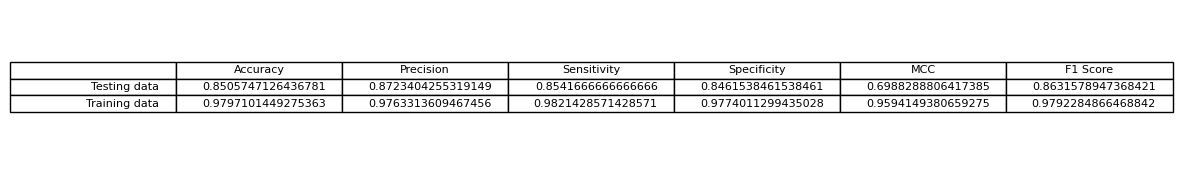

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# Reload the dataset
# Load the dataset
file_path = "C:/Users/aashi/Downloads/SwissProt_Features.csv"
data = pd.read_csv(file_path)

#fixing X and y
rfe_cols = ['Aromaticity', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_N',
       'AAC_P', 'AAC_Q', 'AAC_W', 'DPC1_GF', 'DPC1_LE', 'DPC1_PP', 'DPC1_PR',
       'DPC1_PT', 'DPC1_RT', 'DPC1_VA', 'PCP_PC', 'PCP_NE', 'PCP_HB']
X = data[rfe_cols]
y = data['Label']


# Train-test split with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)

# Define the hyperparameters grid with adjustments for overfitting
param_grid = {
    'n_estimators': [50, 100, 150],  # Reduced number of estimators
    'max_depth': [None, 10, 20],  # Limiting the depth
    'min_samples_split': [5, 10],  # Increased min_samples_split
    'min_samples_leaf': [2, 4],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model on the training set
test_accuracy_1 = accuracy_score(y_test, y_pred)
test_precision_1 = precision_score(y_test, y_pred, average='binary', pos_label=1)
test_recall_1 = recall_score(y_test, y_pred, average='binary', pos_label=1)
test_f1_1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
test_mcc_1 = matthews_corrcoef(y_test, y_pred)

# Calculate specificity for the training set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity_1 = TN / (TN + FP)


#predicting on the train set itself
y_train_pred = grid_search.best_estimator_.predict(X_train)

# Evaluate the model on the training set
train_accuracy_1 = accuracy_score(y_train, y_train_pred)
train_precision_1 = precision_score(y_train, y_train_pred, average='binary', pos_label=1)
train_recall_1 = recall_score(y_train, y_train_pred, average='binary', pos_label=1)
train_f1_1 = f1_score(y_train, y_train_pred, average='binary', pos_label=1)
train_mcc_1 = matthews_corrcoef(y_train, y_train_pred)

# Calculate specificity for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_TN = train_conf_matrix[0, 0]
train_FP = train_conf_matrix[0, 1]
train_specificity_1 = train_TN / (train_TN + train_FP)

data_1 = {
   '' : ['Testing data', 'Training data'],
   'Accuracy' : [test_accuracy_1, train_accuracy_1],
   'Precision' : [test_precision_1, train_precision_1],
   'Sensitivity' : [test_recall_1, train_recall_1],
   'Specificity' : [specificity_1, train_specificity_1],
   'MCC' : [test_mcc_1, train_mcc_1],
   'F1 Score' : [test_f1_1, train_f1_1]
}

df = pd.DataFrame(data_1)

fig, ax = plt.subplots(figsize=(15, 2))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Save as PNG
plt.savefig("swissprot_extratrees_rfe_xgb_hpt.png", bbox_inches='tight', dpi=300)
plt.show()